## <center>1st Kaggle competition : digit recognizer</center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import random
from xgboost import XGBClassifier
from time import time
from tensorflow.python.keras.utils import np_utils, to_categorical
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.constraints import maxnorm

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'

In [41]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data.isnull().any().sum()

0

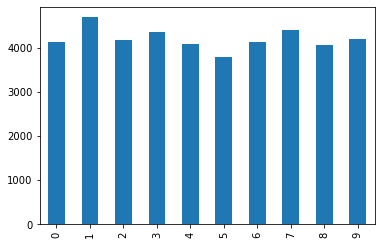

In [44]:
data.label.value_counts().sort_index().plot(kind='bar')

In [45]:
train_data=(data.drop(columns='label')).values
labeled_data_num=(data.label).values
labeled_data=to_categorical(labeled_data_num)
train_data0 = train_data.reshape(train_data.shape[0], 28, 28)

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.show(*args, **kw)>

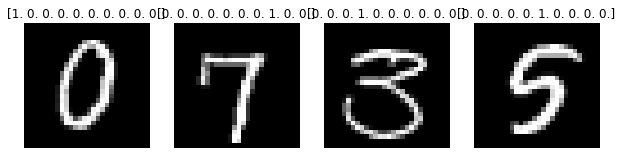

In [46]:
plt.figure(figsize=(13,13))
for i in range(5, 9):
    plt.subplot(450 + (i+1))
    plt.imshow(train_data0[i], cmap=plt.get_cmap('gray'))
    plt.title(labeled_data_num[i])
    plt.axis('off')
plt.show

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='label'), data.label, test_size=0.2, random_state=2)

In [11]:
X=data.drop(columns='label')
y=data.label
# build a classifier
clf = RandomForestClassifier(n_estimators=200)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# use a full grid over all parameters
param_grid = {"max_depth": [1, 3, 5, 6],
              "max_features": [2, 3, 5, 9],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV took 695.26 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.857 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 9}

Model with rank: 2
Mean validation score: 0.853 (std: 0.005)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9}

Model with rank: 3
Mean validation score: 0.827 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3}



In [49]:
rfc  = RandomForestClassifier(n_estimators = 300,criterion= 'gini', max_depth= 5, max_features=9)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9639285714285715

In [59]:
X=data.drop(columns='label')
y=data.label

xgboost = XGBClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# use a full grid over all parameters
param_grid = {"eta": [0.01, 0.2],
              "max_depth": [3,6,9]}

# run grid search
grid_search = GridSearchCV(xgboost, param_grid=param_grid, cv=10, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

KeyboardInterrupt: 

In [58]:
xgb=XGBClassifier(objective='multi:softmax', num_class=10, 
        n_jobs=-1,booster="gbtree",tree_method = "hist",
        grow_policy = "depthwise")
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.9332142857142857

In [3]:
# Read data
train = pd.read_csv('train.csv')
labels = train.label.values.astype('int32')
X_train = (train.drop(columns='label').values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')
y_test=(pd.read_csv('test.csv').values).astype('int32')
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]
X=(train.drop(columns='label').values).astype('float32')
y= train.label.values

In [ ]:
#Grid search all
def create_model(activation='softsign',optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer=initi_mode,activation=activation))
	model.add(Dropout(0.3))
	model.add(Dense(128,kernel_initializer=initi_mode1,activation=activation1))
	model.add(Dropout(0.1))
	model.add(Dense(nb_classes,activation=activation2))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
init_mode1 = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation1 = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation2 = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation,
                  activation1=activation1,
                  activation2=activation2,
                  init_mode=init_mode,
                  init_mode1=init_mode1,
                  optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best parameters: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [99]:
#Grid search for epochs and batch size
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform'))
	model.add(Activation('softsign'))
	model.add(Dropout(0.15))
	model.add(Dense(128,kernel_initializer='zero'))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes,kernel_initializer='lecun_uniform'))
	model.add(Activation('softplus'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model,verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)

# summarize results
print("Best batch size and epochs: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best batch size and epochs: 0.111524 using {'batch_size': 60, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 10, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 10, 'epochs': 50}
0.111524 (0.001483) with: {'batch_size': 10, 'epochs': 100}
0.111524 (0.001483) with: {'batch_size': 20, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 20, 'epochs': 50}
0.111524 (0.001483) with: {'batch_size': 20, 'epochs': 100}
0.111524 (0.001483) with: {'batch_size': 40, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 40, 'epochs': 50}
0.111524 (0.001483) with: {'batch_size': 40, 'epochs': 100}
0.111524 (0.001483) with: {'batch_size': 60, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 60, 'epochs': 50}
0.111524 (0.001483) with: {'batch_size': 60, 'epochs': 100}
0.111524 (0.001483) with: {'batch_size': 80, 'epochs': 10}
0.111524 (0.001483) with: {'batch_size': 80, 'epochs': 50}
0.111524 (0.001483) with: {'batch_size': 80, 'epochs': 100}
0.111524 (0.001483) with: {'batch_

In [21]:
#Grid search for optimizer
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes))
	model.add(Activation('softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best optimizer: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best optimizer: 0.976762 using {'optimizer': 'Adam'}
0.966000 (0.002018) with: {'optimizer': 'SGD'}
0.975786 (0.001814) with: {'optimizer': 'RMSprop'}
0.973690 (0.001514) with: {'optimizer': 'Adagrad'}
0.975762 (0.000948) with: {'optimizer': 'Adadelta'}
0.976762 (0.000551) with: {'optimizer': 'Adam'}
0.975452 (0.000676) with: {'optimizer': 'Adamax'}
0.975571 (0.001080) with: {'optimizer': 'Nadam'}


In [76]:
#Grid search for init mode
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer=init_mode))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes))
	model.add(Activation('softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=100, verbose=0)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best init mode 1: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802286 using {'init_mode': 'lecun_uniform'}
0.098333 (0.001764) with: {'init_mode': 'uniform'}
0.802286 (0.023856) with: {'init_mode': 'lecun_uniform'}
0.125286 (0.026812) with: {'init_mode': 'normal'}
0.111524 (0.001483) with: {'init_mode': 'zero'}
0.778690 (0.030307) with: {'init_mode': 'glorot_normal'}
0.667857 (0.022721) with: {'init_mode': 'glorot_uniform'}
0.684786 (0.047568) with: {'init_mode': 'he_normal'}
0.591452 (0.065356) with: {'init_mode': 'he_uniform'}


In [83]:
#Grid search for init mode
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform'))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(128, kernel_initializer=init_mode))
	model.add(Activation('softsign'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes))
	model.add(Activation('softplus'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=100, verbose=0)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best init mode 2: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best init mode 2: 0.944786 using {'init_mode': 'zero'}
0.106571 (0.006448) with: {'init_mode': 'uniform'}
0.878786 (0.007982) with: {'init_mode': 'lecun_uniform'}
0.754738 (0.022658) with: {'init_mode': 'normal'}
0.944786 (0.001017) with: {'init_mode': 'zero'}
0.893714 (0.003459) with: {'init_mode': 'glorot_normal'}
0.878690 (0.002276) with: {'init_mode': 'glorot_uniform'}
0.870524 (0.012613) with: {'init_mode': 'he_normal'}
0.863929 (0.000642) with: {'init_mode': 'he_uniform'}


In [79]:
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform',activation=activation))
	model.add(Dropout(0.15))
	model.add(Dense(128,activation='relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes,activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best activation 1: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970786 using {'activation': 'softsign'}
0.858643 (0.041130) with: {'activation': 'softmax'}
0.969595 (0.001881) with: {'activation': 'softplus'}
0.970786 (0.001171) with: {'activation': 'softsign'}
0.969357 (0.000210) with: {'activation': 'relu'}
0.968190 (0.001908) with: {'activation': 'tanh'}
0.968190 (0.001268) with: {'activation': 'sigmoid'}
0.966619 (0.001635) with: {'activation': 'hard_sigmoid'}
0.910643 (0.036111) with: {'activation': 'linear'}


In [81]:
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform',activation='softsign'))
	model.add(Dropout(0.15))
	model.add(Dense(128,activation=activation))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes,activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best activation 2: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971429 using {'activation': 'relu'}
0.952524 (0.003127) with: {'activation': 'softmax'}
0.970476 (0.000962) with: {'activation': 'softplus'}
0.967429 (0.001489) with: {'activation': 'softsign'}
0.971429 (0.001149) with: {'activation': 'relu'}
0.969452 (0.001137) with: {'activation': 'tanh'}
0.967548 (0.002148) with: {'activation': 'sigmoid'}
0.968976 (0.001285) with: {'activation': 'hard_sigmoid'}
0.965071 (0.000964) with: {'activation': 'linear'}


In [110]:
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform',activation='softsign'))
	model.add(Dropout(0.15))
	model.add(Dense(128,activation='relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes,activation=activation))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best activation 3: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best activation 3: 0.971429 using {'activation': 'softplus'}
0.971071 (0.000058) with: {'activation': 'softmax'}
0.971429 (0.001444) with: {'activation': 'softplus'}
0.143476 (0.065150) with: {'activation': 'softsign'}
0.098381 (0.001807) with: {'activation': 'relu'}
0.208786 (0.016779) with: {'activation': 'tanh'}
0.970857 (0.000763) with: {'activation': 'sigmoid'}
0.500405 (0.069335) with: {'activation': 'hard_sigmoid'}
0.098381 (0.001807) with: {'activation': 'linear'}


In [9]:
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform',
                    activation='softsign',kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(128,activation='relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes,activation='softplus'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 4, 5]
dropout_rate = [0.1, 0.3,  0.5, 0.7, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best neurons: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best neurons: 0.972738 using {'dropout_rate': 0.3, 'weight_constraint': 1}
0.972286 (0.001318) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.971310 (0.001268) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.970667 (0.002029) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.970690 (0.000792) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.972738 (0.001464) with: {'dropout_rate': 0.3, 'weight_constraint': 1}
0.971452 (0.001031) with: {'dropout_rate': 0.3, 'weight_constraint': 2}
0.971905 (0.001378) with: {'dropout_rate': 0.3, 'weight_constraint': 4}
0.970333 (0.000923) with: {'dropout_rate': 0.3, 'weight_constraint': 5}
0.968881 (0.001045) with: {'dropout_rate': 0.5, 'weight_constraint': 1}
0.969833 (0.001116) with: {'dropout_rate': 0.5, 'weight_constraint': 2}
0.968976 (0.001887) with: {'dropout_rate': 0.5, 'weight_constraint': 4}
0.969810 (0.001566) with: {'dropout_rate': 0.5, 'weight_constraint': 5}
0.960024 (0.001058) with: {'dropout_rate': 0.7, 'weight_const

In [29]:
train = pd.read_csv('train.csv')
labels = train.label.values.astype('int32')
X_train = (train.drop(columns='label').values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim=input_dim,kernel_initializer='lecun_uniform',
                kernel_constraint=maxnorm(2)))
model.add(Activation('softsign'))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_classes))
model.add(Activation('softplus'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

print("Training...")
model.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.1, verbose=2)


Training...
Train on 37800 samples, validate on 4200 samples
Epoch 1/60
 - 16s - loss: 0.3481 - acc: 0.8942 - val_loss: 0.1850 - val_acc: 0.9421
Epoch 2/60
 - 15s - loss: 0.1913 - acc: 0.9399 - val_loss: 0.1578 - val_acc: 0.9493
Epoch 3/60
 - 15s - loss: 0.1599 - acc: 0.9485 - val_loss: 0.1510 - val_acc: 0.9524
Epoch 4/60
 - 15s - loss: 0.1480 - acc: 0.9520 - val_loss: 0.1100 - val_acc: 0.9662
Epoch 5/60
 - 15s - loss: 0.1362 - acc: 0.9568 - val_loss: 0.1591 - val_acc: 0.9502
Epoch 6/60
 - 15s - loss: 0.1350 - acc: 0.9580 - val_loss: 0.1381 - val_acc: 0.9512
Epoch 7/60
 - 15s - loss: 0.1285 - acc: 0.9593 - val_loss: 0.1371 - val_acc: 0.9595
Epoch 8/60
 - 15s - loss: 0.1267 - acc: 0.9610 - val_loss: 0.1097 - val_acc: 0.9676
Epoch 9/60
 - 16s - loss: 0.1249 - acc: 0.9601 - val_loss: 0.1314 - val_acc: 0.9600
Epoch 10/60
 - 16s - loss: 0.1209 - acc: 0.9617 - val_loss: 0.1511 - val_acc: 0.9545
Epoch 11/60
 - 15s - loss: 0.1269 - acc: 0.9602 - val_loss: 0.1325 - val_acc: 0.9569
Epoch 12/60
 